# Captsone Project - 7Park 
#### The goal of the project is to predict Zillow Home/Rent values using data models.
##### Dependent Variable: ZORI 
##### Predictors: Recommended Census (ACS) Data & Other Gov't Data Sources

In [1]:
!pip install google-cloud-bigquery-storage
!pip install --upgrade "google-cloud-bigquery[pandas]"
!pip install pyarrow

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [8]:
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="optical-hexagon-308004-a6230a51110a.json"
client = bigquery.Client()


In [9]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [10]:
%%bigquery zip_codes_2015
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`

Downloading: 100%|███████████████████████████████████████████████████████████| 33120/33120 [00:20<00:00, 1603.78rows/s]


In [6]:
zip_codes_2015.shape

(33120, 247)

In [10]:
for col in zip_codes_2015.columns:
    print(col)

geo_id
nonfamily_households
family_households
median_year_structure_built
rent_burden_not_computed
rent_over_50_percent
rent_40_to_50_percent
rent_35_to_40_percent
rent_30_to_35_percent
rent_25_to_30_percent
rent_20_to_25_percent
rent_15_to_20_percent
rent_10_to_15_percent
rent_under_10_percent
total_pop
male_pop
female_pop
median_age
white_pop
black_pop
asian_pop
hispanic_pop
amerindian_pop
other_race_pop
two_or_more_races_pop
not_hispanic_pop
commuters_by_public_transportation
households
median_income
income_per_capita
housing_units
vacant_housing_units
vacant_housing_units_for_rent
vacant_housing_units_for_sale
median_rent
percent_income_spent_on_rent
owner_occupied_housing_units
million_dollar_housing_units
mortgaged_housing_units
families_with_young_children
two_parent_families_with_young_children
two_parents_in_labor_force_families_with_young_children
two_parents_father_in_labor_force_families_with_young_children
two_parents_mother_in_labor_force_families_with_young_children
two_

In [16]:
zip_codes_2015.head()

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,e

(array([2.9993e+04, 2.3090e+03, 5.9900e+02, 1.4600e+02, 4.8000e+01,
        1.0000e+01, 1.0000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([    0. ,  1716.4,  3432.8,  5149.2,  6865.6,  8582. , 10298.4,
        12014.8, 13731.2, 15447.6, 17164. ]),
 <a list of 10 Patch objects>)

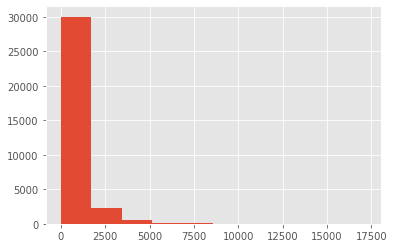

In [30]:
plt.hist(zip_codes_2015["masters_degree"].astype(int))

(array([3.1974e+04, 9.4100e+02, 1.3300e+02, 3.4000e+01, 1.7000e+01,
        1.0000e+01, 7.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([   0. ,  537.1, 1074.2, 1611.3, 2148.4, 2685.5, 3222.6, 3759.7,
        4296.8, 4833.9, 5371. ]),
 <a list of 10 Patch objects>)

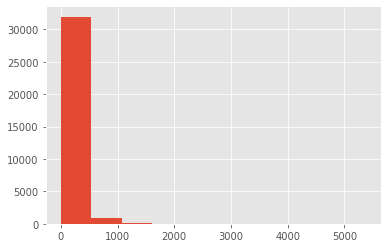

In [36]:
plt.hist(zip_codes_2015["employed_information"].astype(int))

In [16]:
#Missing Values Count 
zip_codes_2015.isnull().sum()[zip_codes_2015.isnull().sum() > 0]

median_year_structure_built                                      890
median_age                                                       505
median_income                                                   2053
income_per_capita                                                578
median_rent                                                     5880
percent_income_spent_on_rent                                    5298
aggregate_travel_time_to_work                                  12744
renter_occupied_housing_units_paying_cash_median_gross_rent     5689
owner_occupied_housing_units_lower_value_quartile               2879
owner_occupied_housing_units_median_value                       2327
owner_occupied_housing_units_upper_value_quartile               2356
bachelors_degree_2                                               131
different_house_year_ago_different_city                          131
different_house_year_ago_same_city                               131
gini_index                        

In [20]:
# zip_codes_2015.value_counts()
zip_codes_2015.describe()

,geo_id,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administration,employed_retail_trade,e

In [15]:
zip_codes_2015.geoid.unique() #We Can Eliminate this Feature

array([None], dtype=object)